In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Importation

In [2]:
X_train = pd.read_csv("AMF_train_X.csv")
Y_train = pd.read_csv("AMF_train_Y.csv")

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105782 entries, 0 to 105781
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

# Mise en forme et nettoyage

In [4]:
X_train["Day"] = X_train["Day"].str.replace("Date_", "").astype(int)
X_train["Trader"] = X_train["Trader"].str.replace("Trader_", "").astype(int)
Y_train["Trader"] = Y_train["Trader"].str.replace("Trader_", "").astype(int)

In [5]:
merged_df = X_train.merge(Y_train, on = "Trader")

In [6]:
merged_df["type"] = merged_df["type"].astype("category")

In [7]:
f_to_delete = ["Index", "Share"]
merged_df.drop(columns=f_to_delete, inplace=True)

In [8]:
merged_df=merged_df.fillna(merged_df.mean()) #correction des données manquantes avec la moyenne


C:\Users\ianis\AppData\Local\Temp/ipykernel_12840/500289778.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df=merged_df.fillna(merged_df.mean()) #correction des données manquantes avec la moyenne


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 0 to 105781
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Day                         105782 non-null  int32   
 1   Trader                      105782 non-null  int32   
 2   OTR                         105782 non-null  float64 
 3   OCR                         105782 non-null  float64 
 4   OMR                         105782 non-null  float64 
 5   min_time_two_events         105782 non-null  float64 
 6   mean_time_two_events        105782 non-null  float64 
 7   10_p_time_two_events        105782 non-null  float64 
 8   med_time_two_events         105782 non-null  float64 
 9   25_p_time_two_events        105782 non-null  float64 
 10  75_p_time_two_events        105782 non-null  float64 
 11  90_p_time_two_events        105782 non-null  float64 
 12  max_time_two_events         105782 non-null  float64 
 13 

In [10]:
merged_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #suppression des lignes avec données manquantes


,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,24,10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,4,NON HFT
1,29,10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,15,NON HFT
2,23,10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,63,NON HFT
3,11,10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,4,NON HFT
4,9,10,1.517730,26.750000,164.469153,0.0,944.008551,0.000071,0.001364,0.000146,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,38,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,27,60,1.150000,23.000000,164.469153,0.0,736.500080,0.000000,0.000188,0.000039,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,3,NON HFT
105778,18,60,1.352941,23.000000,164.469153,0.0,63.672695,0.000000,0.000963,0.000176,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,7,NON HFT
105779,13,60,1.146667,86.000000,164.469153,0.0,708.440816,0.000000,0.000578,0.000062,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,16,NON HFT
105780,30,60,1.179191,204.000000,164.469153,0.0,384.893976,0.000000,0.000536,0.000242,...,598.63774,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,35,NON HFT


<AxesSubplot:>

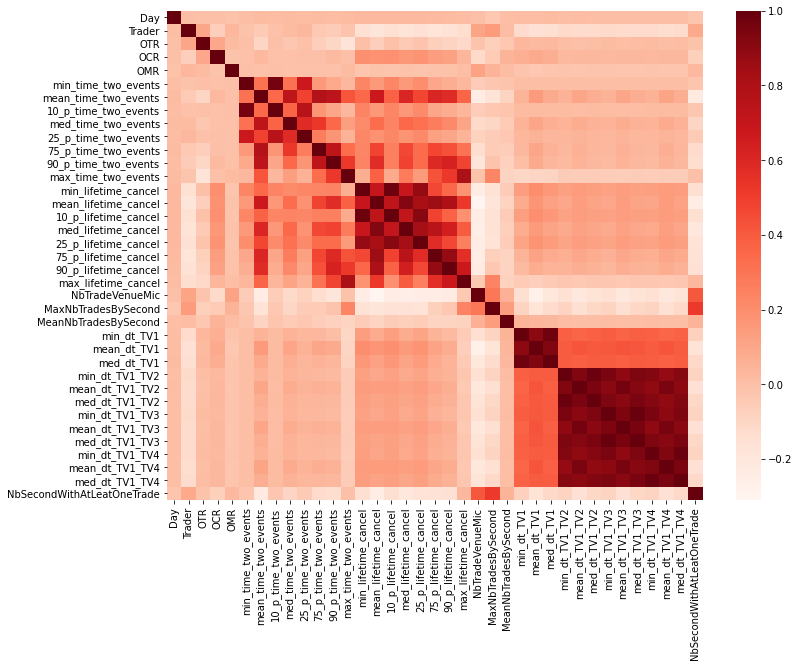

In [11]:
corr = merged_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,cmap="Reds") 

In [12]:
merged_df.var() #la variance ne permet pas de supprimer des variables de façon évidente

C:\Users\ianis\AppData\Local\Temp/ipykernel_12840/2337214586.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.var() #la variance ne permet pas de supprimer des variables de façon évidente


Day                           7.507884e+01
Trader                        1.311715e+04
OTR                           1.854087e+04
OCR                           5.161449e+03
OMR                           4.745976e+05
min_time_two_events           2.402415e+06
mean_time_two_events          2.485172e+07
10_p_time_two_events          2.614855e+06
med_time_two_events           2.467533e+07
25_p_time_two_events          5.381782e+06
75_p_time_two_events          1.088259e+08
90_p_time_two_events          2.032437e+08
max_time_two_events           3.158596e+08
min_lifetime_cancel           4.451709e+07
mean_lifetime_cancel          8.354307e+07
10_p_lifetime_cancel          4.637221e+07
med_lifetime_cancel           8.785215e+07
25_p_lifetime_cancel          5.672915e+07
75_p_lifetime_cancel          1.761064e+08
90_p_lifetime_cancel          2.454680e+08
max_lifetime_cancel           3.116835e+08
NbTradeVenueMic               1.923050e+01
MaxNbTradesBySecond           1.243558e+03
MeanNbTrade

# Normalisation


In [13]:
type_df = merged_df["type"] #Problème pour normaliser donc on retire les colonnes juste avant et on les remet apres normalisation
trader_df = merged_df["Trader"]

In [14]:
merged_df=merged_df.drop(["type"], axis=1) 
merged_df=merged_df.drop(["Trader"], axis=1)

In [15]:
for column in merged_df.columns:   #normalisation retournait erreur str donc transformation des str en int au début du code
    merged_df[column] = merged_df[column]  / merged_df[column].abs().max()

In [16]:
merged_df.insert(1, "Type", type_df, allow_duplicates=True) #Réinsertion des colonnes retirées
merged_df.insert(2, "Trader", trader_df, allow_duplicates=True)

In [17]:
merged_df.head(5000)

,Day,Type,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,0.800000,NON HFT,10,0.000129,0.000578,0.000098,0.0,0.097355,0.000000e+00,7.983610e-03,...,9.630082e-03,0.019370,0.012600,1.004693e-02,0.019600,0.012995,1.002797e-02,0.019905,0.013032,0.000308
1,0.966667,NON HFT,10,0.000097,0.001747,0.000169,0.0,0.035134,1.407680e-09,6.418260e-08,...,9.630082e-03,0.019370,0.012600,1.004693e-02,0.019600,0.012995,1.002797e-02,0.019905,0.013032,0.001157
2,0.766667,NON HFT,10,0.000084,0.003283,0.000925,0.0,0.013055,1.350612e-09,1.139460e-08,...,9.630082e-03,0.019370,0.012600,1.004693e-02,0.019600,0.012995,1.002797e-02,0.019905,0.013032,0.004859
3,0.366667,NON HFT,10,0.000097,0.001006,0.000227,0.0,0.041362,0.000000e+00,1.170403e-04,...,9.630082e-03,0.019370,0.012600,1.004693e-02,0.019600,0.012995,1.002797e-02,0.019905,0.013032,0.000308
4,0.300000,NON HFT,10,0.000086,0.001856,0.001286,0.0,0.017958,1.350612e-09,2.594697e-08,...,9.630082e-03,0.019370,0.012600,1.004693e-02,0.019600,0.012995,1.002797e-02,0.019905,0.013032,0.002931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.800000,NON HFT,114,0.000364,0.001110,0.001286,0.0,0.118983,0.000000e+00,0.000000e+00,...,2.620949e-09,0.027275,0.005660,2.620949e-09,0.027275,0.005660,2.620949e-09,0.027275,0.005660,0.003316
4996,0.966667,NON HFT,114,0.000165,0.001076,0.001286,0.0,0.084062,0.000000e+00,1.015023e-03,...,6.070248e-08,0.008065,0.002463,6.070248e-08,0.008065,0.002463,6.070248e-08,0.008065,0.002463,0.011954
4997,0.800000,NON HFT,114,0.000376,0.001145,0.001286,0.0,0.115677,0.000000e+00,0.000000e+00,...,6.212996e-03,0.013282,0.013688,6.212996e-03,0.013282,0.013688,6.212996e-03,0.013282,0.013688,0.001697
4998,0.666667,NON HFT,114,0.000264,0.001180,0.001286,0.0,0.130686,0.000000e+00,2.657266e-05,...,6.313015e-04,0.018140,0.019511,6.313015e-04,0.018140,0.019511,6.313015e-04,0.018140,0.019511,0.003316


# Selection du modèle / Training Phase

In [36]:
X = merged_df.drop(["Type"], axis=1)
y = merged_df[["Trader","Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
X_train_less_trader = X_train.drop("Trader", axis=1)
X_test_trader = X_test["Trader"]
X_test_trader = X_test_trader.to_numpy()

In [38]:
test_datas = y_test.drop_duplicates().sort_values(by=['Trader']).set_index("Trader")["Type"]
test_datas

Trader
10     NON HFT
16     NON HFT
26         MIX
35         HFT
38         MIX
        ...   
442    NON HFT
446    NON HFT
451        MIX
453        HFT
461        MIX
Name: Type, Length: 81, dtype: category
Categories (3, object): ['HFT', 'MIX', 'NON HFT']

Fonction d'assignation des classes :

In [39]:
def type_conditions(X, y, seuil_mix = 0.4, seuil_hft = 0.8): # meilleurs seuils obtenus manuellement, optimisation possible ?
    
    #fonction d'attribution de classe du trader
    
    trader = X["Trader"].to_numpy()
    transpo = pd.DataFrame([trader, y]).transpose()
    group = transpo.groupby([0,1]).size()
    result = group.unstack(level=-1).fillna(0)
    matrice = pd.Series(dtype = str)
    
    for index, row in result.iterrows():
        somme = row[0] + row[1] + row[2]
        if row[0]/somme > seuil_hft:
            matrice.at[index] = 'HFT'
        elif row[1]/somme > seuil_mix:
            matrice.at[index] = 'MIX'
        else:
            matrice.at[index] = 'NON HFT'
    matrice = matrice.astype("category")
    
    return matrice 

# LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_less_trader, y_train['Type'])


LinearDiscriminantAnalysis()

In [42]:
y_pred_lda = lda.predict(X_test.drop("Trader", axis=1))

In [43]:
matrice_lda = type_conditions(X_test, y_pred_lda)

In [44]:
lda_confusion_matrix = confusion_matrix(test_datas, matrice_lda)
lda_confusion_matrix #permet de voir la répartition dans les classes 

array([[ 1,  5,  8],
       [ 0, 20,  3],
       [ 3, 11, 30]], dtype=int64)

In [45]:
from sklearn.metrics import f1_score #évaluation du modèle

In [46]:
print("Score :", f1_score(test_datas, matrice_lda, average='micro'))

Score : 0.6296296296296297


Score mauvais, lda peu adapté

# SVM

In [35]:
from sklearn import svm

In [30]:
svm = svm.SVC(kernel="rbf") 
svm.fit(X_train_less_trader, y_train['Type'])

SVC()

In [31]:
y_pred_svm = svm.predict(X_test.drop("Trader", axis=1))

In [32]:
matrice_svm = type_conditions(X_test, y_pred_svm)

In [33]:
svm_confusion_matrix = confusion_matrix(test_datas, matrice_svm)
svm_confusion_matrix

array([[ 5,  8,  2],
       [ 0, 23,  1],
       [ 0, 11, 34]], dtype=int64)

In [34]:
print("Score :", f1_score(test_datas, matrice_svm, average='micro'))

Score : 0.7380952380952381


Score bon mais pas suffisant

# Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train_less_trader, y_train['Type'])


RandomForestClassifier()

In [49]:
y_pred_rfc = rfc.predict(X_test.drop("Trader", axis=1))

In [50]:
matrice_rfc = type_conditions(X_test, y_pred_rfc)

In [51]:
rfc_confusion_matrix = confusion_matrix(test_datas, matrice_rfc)
rfc_confusion_matrix

array([[12,  0,  2],
       [ 0, 22,  1],
       [ 0,  1, 43]], dtype=int64)

In [52]:
print("Score :", f1_score(test_datas, matrice_rfc, average='micro'))

Score : 0.9506172839506173


Le Random Forest fonctionne très bien 

# Sélection des paramètres

In [53]:
from sklearn.feature_selection import SelectFromModel

In [54]:
model = SelectFromModel(RandomForestClassifier())

model.fit(X_train_less_trader, y_train['Type'])

SelectFromModel(estimator=RandomForestClassifier())

In [55]:
model.get_support()

array([False,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [56]:
selected_features = merged_df.drop(["Trader","Type"], axis=1).columns[(model.get_support())]
len(selected_features)

14

In [57]:
print(selected_features)

Index(['OTR', 'OCR', 'OMR', 'mean_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel', 'max_lifetime_cancel', 'NbTradeVenueMic'],
      dtype='object')


Training modèle avec nouveaux paramètres :

In [58]:
df = merged_df[['Type','Trader','OTR', 'OCR', 'OMR', 'mean_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       'NbTradeVenueMic']]

In [59]:
X = df.drop(["Type"], axis=1)
y = df[["Trader","Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
X_train_less_trader = X_train.drop("Trader", axis=1)
X_test_trader = X_test["Trader"]
X_test_trader = X_test_trader.to_numpy()

In [61]:
test_datas = y_test.drop_duplicates().sort_values(by=['Trader']).set_index("Trader")["Type"]
test_datas

Trader
10     NON HFT
16     NON HFT
26         MIX
35         HFT
38         MIX
        ...   
442    NON HFT
446    NON HFT
451        MIX
453        HFT
461        MIX
Name: Type, Length: 84, dtype: category
Categories (3, object): ['HFT', 'MIX', 'NON HFT']

In [62]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_less_trader, y_train['Type'])


RandomForestClassifier()

In [63]:
y_pred_rfc2 = rfc2.predict(X_test.drop("Trader", axis=1))

In [64]:
matrice_rfc2 = type_conditions(X_test, y_pred_rfc2)

In [65]:
rfc2_confusion_matrix = confusion_matrix(test_datas, matrice_rfc2)
rfc2_confusion_matrix

array([[12,  0,  3],
       [ 0, 22,  2],
       [ 0,  3, 42]], dtype=int64)

In [66]:
print("Score :", f1_score(test_datas, matrice_rfc2, average='micro'))

Score : 0.9047619047619048


Modèle a à peu près égal donc on conserve les paramètres initiaux. Logique car Arbre de décision évalue l'importance des features.

Vérifions que les features sélectionnés ne donnent pas un meilleur score au LDA et SVM :

In [67]:
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_train_less_trader, y_train['Type'])
y_pred_lda2 = lda2.predict(X_test.drop("Trader", axis=1))
matrice_lda2 = type_conditions(X_test, y_pred_lda2)
print("Score :", f1_score(test_datas, matrice_lda2, average='micro'))

Score : 0.47619047619047616


In [68]:
svm2 = svm.SVC(kernel="rbf") 
svm2.fit(X_train_less_trader, y_train['Type'])
y_pred_svm2 = svm2.predict(X_test.drop("Trader", axis=1))
matrice_svm2 = type_conditions(X_test, y_pred_svm2)
print("Score :", f1_score(test_datas, matrice_svm2, average='micro'))

Score : 0.6428571428571429


Scores moins bons donc on reste sur du Random Forest

# Test

In [69]:
X_test = pd.read_csv("AMF_test_X.csv")

In [70]:
f_to_delete = ["Index", "Share"]
X_test.drop(columns=f_to_delete, inplace=True)

In [71]:
X_test["Day"] = X_test["Day"].str.replace("Date_", "").astype(int)

In [72]:
X_test.head(100)

,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,12,Adelaide,1.114754,68.000000,NaN,0.000012,22.905096,0.000061,0.003870,0.000196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1,2,Adelaide,1.666667,5.000000,NaN,0.001970,67.630572,0.001970,0.005786,0.001970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,13,Adelaide,1.088235,37.000000,NaN,0.000000,39.506490,0.000000,0.000485,0.000070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,7,Adelaide,2.250000,4.500000,NaN,0.000000,103.378733,0.000000,0.004708,0.001081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,20,Adelaide,1.266667,19.000000,NaN,0.000026,49.417177,0.000063,0.000152,0.000065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22,Alice,92.168050,2.044754,NaN,0.000000,30.825504,0.000957,1.232406,0.101486,...,0.000002,14.713705,2.495991,0.000002,14.199957,2.017780,0.000002,14.262411,2.041451,1223
96,3,Alice,37.746154,2.103300,NaN,0.000000,157.468461,0.000724,22.460644,0.264285,...,0.000002,199.042321,0.028550,0.000001,215.400682,0.002545,0.000031,210.750083,0.028550,84
97,12,Alice,26.751515,2.146365,NaN,0.000000,159.236789,0.000066,7.847508,0.030409,...,0.000001,86.151217,0.001168,0.000002,71.180687,0.002605,0.000014,68.766436,0.004829,192
98,13,Alice,43.433628,2.088955,NaN,0.000000,159.750892,0.000137,9.515176,0.169421,...,0.000005,132.917335,39.111108,0.000004,103.600972,0.202736,0.000013,102.055489,2.648586,162


In [73]:
X_test=X_test.fillna(X_test.mean())

C:\Users\ianis\AppData\Local\Temp/ipykernel_12840/3086242346.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test=X_test.fillna(X_test.mean())


In [74]:
X_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,12,Adelaide,1.114754,68.000000,107.677408,0.000012,22.905096,0.000061,0.003870,0.000196,...,345.223435,685.415387,439.782803,373.210675,702.511207,467.71092,378.280177,702.297801,470.505852,16
1,2,Adelaide,1.666667,5.000000,107.677408,0.001970,67.630572,0.001970,0.005786,0.001970,...,345.223435,685.415387,439.782803,373.210675,702.511207,467.71092,378.280177,702.297801,470.505852,1
2,13,Adelaide,1.088235,37.000000,107.677408,0.000000,39.506490,0.000000,0.000485,0.000070,...,345.223435,685.415387,439.782803,373.210675,702.511207,467.71092,378.280177,702.297801,470.505852,6
3,7,Adelaide,2.250000,4.500000,107.677408,0.000000,103.378733,0.000000,0.004708,0.001081,...,345.223435,685.415387,439.782803,373.210675,702.511207,467.71092,378.280177,702.297801,470.505852,2
4,20,Adelaide,1.266667,19.000000,107.677408,0.000026,49.417177,0.000063,0.000152,0.000065,...,345.223435,685.415387,439.782803,373.210675,702.511207,467.71092,378.280177,702.297801,470.505852,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85299,22,The Magic Mirror,2.871595,5.857143,123.000000,0.000000,883.517330,0.000007,17.002092,2.998133,...,0.001000,140.261809,64.474000,0.001000,167.194486,59.90100,0.001000,141.082862,59.901000,219
85300,17,The Magic Mirror,5.212121,3.071429,107.677408,0.000000,172.979466,0.000005,68.548670,3.979818,...,0.078000,402.834120,231.139000,0.001000,248.172895,78.28500,0.054000,170.699750,78.285000,48
85301,2,The Magic Mirror,4.455210,3.856013,16.355705,0.000000,89.774309,0.000083,1.865339,0.066044,...,0.001000,43.524025,19.587000,0.001000,40.202416,15.38800,0.001000,41.509048,16.328000,671
85302,5,The Magic Mirror,6.447761,2.989619,432.000000,0.000000,160.000783,0.000000,31.689264,2.000263,...,0.001000,178.700616,88.792000,0.001000,199.806264,109.09100,0.001000,181.848526,88.792000,165


In [75]:
trader_df = X_test["Trader"]

In [76]:
X_test =X_test.drop(["Trader"], axis=1)

In [77]:
for column in X_test.columns:   #normalisation 
    X_test[column] = X_test[column]  / X_test[column].abs().max()

In [78]:
X_test.insert(1, "Trader", trader_df, allow_duplicates=True)

In [79]:
y_end = rfc.predict(X_test.drop("Trader", axis=1))

In [80]:
matrice_finale = type_conditions(X_test, y_end)

In [81]:
matrice_finale

Adelaide            NON HFT
Alana               NON HFT
Alcmene             NON HFT
Alice                   MIX
Alices Sister       NON HFT
                     ...   
Monstro                 MIX
Morgana                 MIX
The Doorknob            MIX
The Doorman             MIX
The Magic Mirror        MIX
Length: 85, dtype: category
Categories (3, object): ['HFT', 'MIX', 'NON HFT']

In [82]:
matrice_finale.to_csv("resultat.csv")

# Mise au format du fichier csv

In [83]:
resultat = pd.read_csv("resultat.csv")

In [84]:
resultat.rename({'Unnamed: 0':'Trader', '0':'type'}, axis=1, inplace=True)
resultat

,Trader,type
0,Adelaide,NON HFT
1,Alana,NON HFT
2,Alcmene,NON HFT
3,Alice,MIX
4,Alices Sister,NON HFT
...,...,...
80,Monstro,MIX
81,Morgana,MIX
82,The Doorknob,MIX
83,The Doorman,MIX


In [85]:
resultat.to_csv("Y_test.csv",index=False)